In [1]:
import pandas as pd
import numpy as np
import xarray
import os
import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path_albedo = r"../../Data/albedo_data/"
path_optical = r"../../Data/optical-rs/unzipped/"
out_path = r"../../"

Read all albedo files and add mask to filter out everything <= 0.565 which corresponds to ice

In [3]:
df_albedo = pd.DataFrame()

# read in all files in albedo_data folder with xarray (June, July and August of 2019) 
for file in os.listdir(path_albedo):

    print(file)

    df_temp = xarray.open_dataset(path_albedo + file).to_dataframe().reset_index()
    df_temp.rename(columns={"band_data": file[:10]}, inplace=True)
    df_albedo = pd.concat([df_albedo, df_temp[[file[:10]]]], axis=1)

2019-06-10_albedo_bb_planar_sw.tif
2019-06-11_albedo_bb_planar_sw.tif
2019-06-12_albedo_bb_planar_sw.tif
2019-06-13_albedo_bb_planar_sw.tif
2019-06-14_albedo_bb_planar_sw.tif
2019-06-15_albedo_bb_planar_sw.tif
2019-06-16_albedo_bb_planar_sw.tif
2019-06-17_albedo_bb_planar_sw.tif
2019-06-18_albedo_bb_planar_sw.tif
2019-06-19_albedo_bb_planar_sw.tif
2019-06-20_albedo_bb_planar_sw.tif
2019-06-21_albedo_bb_planar_sw.tif
2019-06-22_albedo_bb_planar_sw.tif
2019-06-23_albedo_bb_planar_sw.tif
2019-06-24_albedo_bb_planar_sw.tif
2019-06-25_albedo_bb_planar_sw.tif
2019-06-26_albedo_bb_planar_sw.tif
2019-06-27_albedo_bb_planar_sw.tif
2019-06-28_albedo_bb_planar_sw.tif
2019-06-29_albedo_bb_planar_sw.tif
2019-06-30_albedo_bb_planar_sw.tif
2019-07-01_albedo_bb_planar_sw.tif
2019-07-02_albedo_bb_planar_sw.tif
2019-07-03_albedo_bb_planar_sw.tif
2019-07-04_albedo_bb_planar_sw.tif
2019-07-05_albedo_bb_planar_sw.tif
2019-07-06_albedo_bb_planar_sw.tif
2019-07-07_albedo_bb_planar_sw.tif
2019-07-08_albedo_bb

In [4]:
# apply mask of >= 0.565 to each column
df_albedo_mask = df_albedo.mask(df_albedo <= 0.565)

# create dictionary of column names and indices where values are not NaNs
df_albedo_mask_dict = {col: df_albedo_mask[col].dropna().index for col in df_albedo_mask.columns}

del df_albedo, df_albedo_mask, df_temp

In [5]:
# df to keep all optical values in a row
optical_values = []

# read in the optical data of June, August and July of 2019
for month in ["06", "07", "08"]:
    for day in range(1, 32):
        date = f"2019-{month}-{day:02d}"

        try:
        
            # read in the data
            path = f"{path_optical}{date}_grain_diameter.tif"
            file = xarray.open_dataarray(path).to_dataframe().reset_index()
            # rename column band_data to date
            file = file.rename(columns={"band_data": date})
            try:
                # apply mask of df_albedo_mask_dict to date column if albedo data exists for that date
                file[date] = file[date].mask(file.index.isin(df_albedo_mask_dict[date]))
                print(date)
            except KeyError:
                print(f"KeyError: {date} not in df_albedo_mask_dict")
                continue
            
            # concat date column to optical dataframe on axis = 1
            optical_values.append(file[date].dropna().tolist())

        except:
            print(f"FileNotFoundError: {path} not found")
            pass

del file

# flatten list
optical_values = [item for sublist in optical_values for item in sublist]

FileNotFoundError: ../../Data/optical-rs/unzipped/2019-06-01_grain_diameter.tif not found
FileNotFoundError: ../../Data/optical-rs/unzipped/2019-06-02_grain_diameter.tif not found
FileNotFoundError: ../../Data/optical-rs/unzipped/2019-06-03_grain_diameter.tif not found
FileNotFoundError: ../../Data/optical-rs/unzipped/2019-06-04_grain_diameter.tif not found
FileNotFoundError: ../../Data/optical-rs/unzipped/2019-06-05_grain_diameter.tif not found
FileNotFoundError: ../../Data/optical-rs/unzipped/2019-06-06_grain_diameter.tif not found
FileNotFoundError: ../../Data/optical-rs/unzipped/2019-06-07_grain_diameter.tif not found
KeyError: 2019-06-08 not in df_albedo_mask_dict
FileNotFoundError: ../../Data/optical-rs/unzipped/2019-06-09_grain_diameter.tif not found
2019-06-10
2019-06-11
2019-06-12
2019-06-13
2019-06-14
2019-06-15
2019-06-16
2019-06-17
2019-06-18
2019-06-19
2019-06-20
2019-06-21
2019-06-22
2019-06-23
2019-06-24
2019-06-25
2019-06-26
2019-06-27
2019-06-28
2019-06-29
2019-06-30
F

<AxesSubplot: ylabel='Density'>

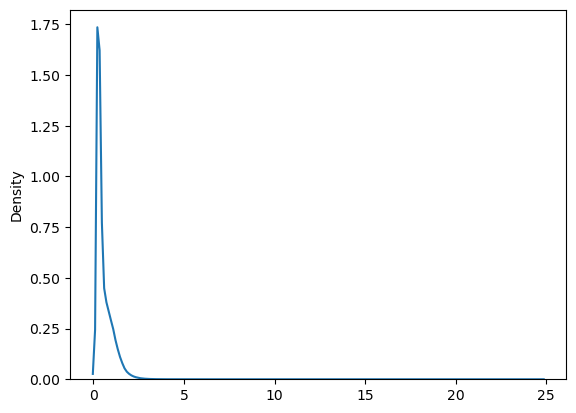

In [6]:
# create a distribution density plot
sns.kdeplot(optical_values)

In [15]:
# create copy of optical_values and remove everything below 2
optical_values_copy = optical_values.copy()
optical_values_copy = [x for x in optical_values_copy if x >= 2]

<AxesSubplot: ylabel='Density'>

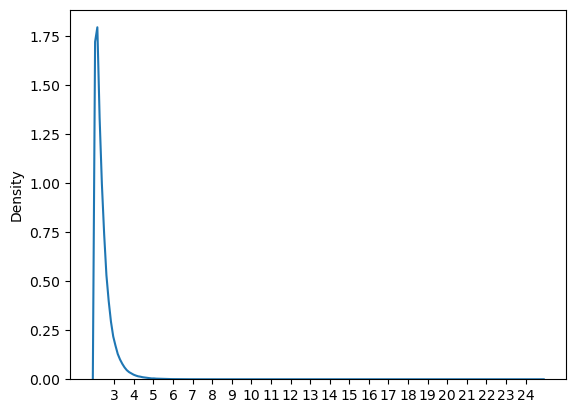

In [16]:
# create another density plot with x ticks in 1 steps
plt.xticks(np.arange(3, 25, 1))
sns.kdeplot(optical_values_copy)

plt.show()

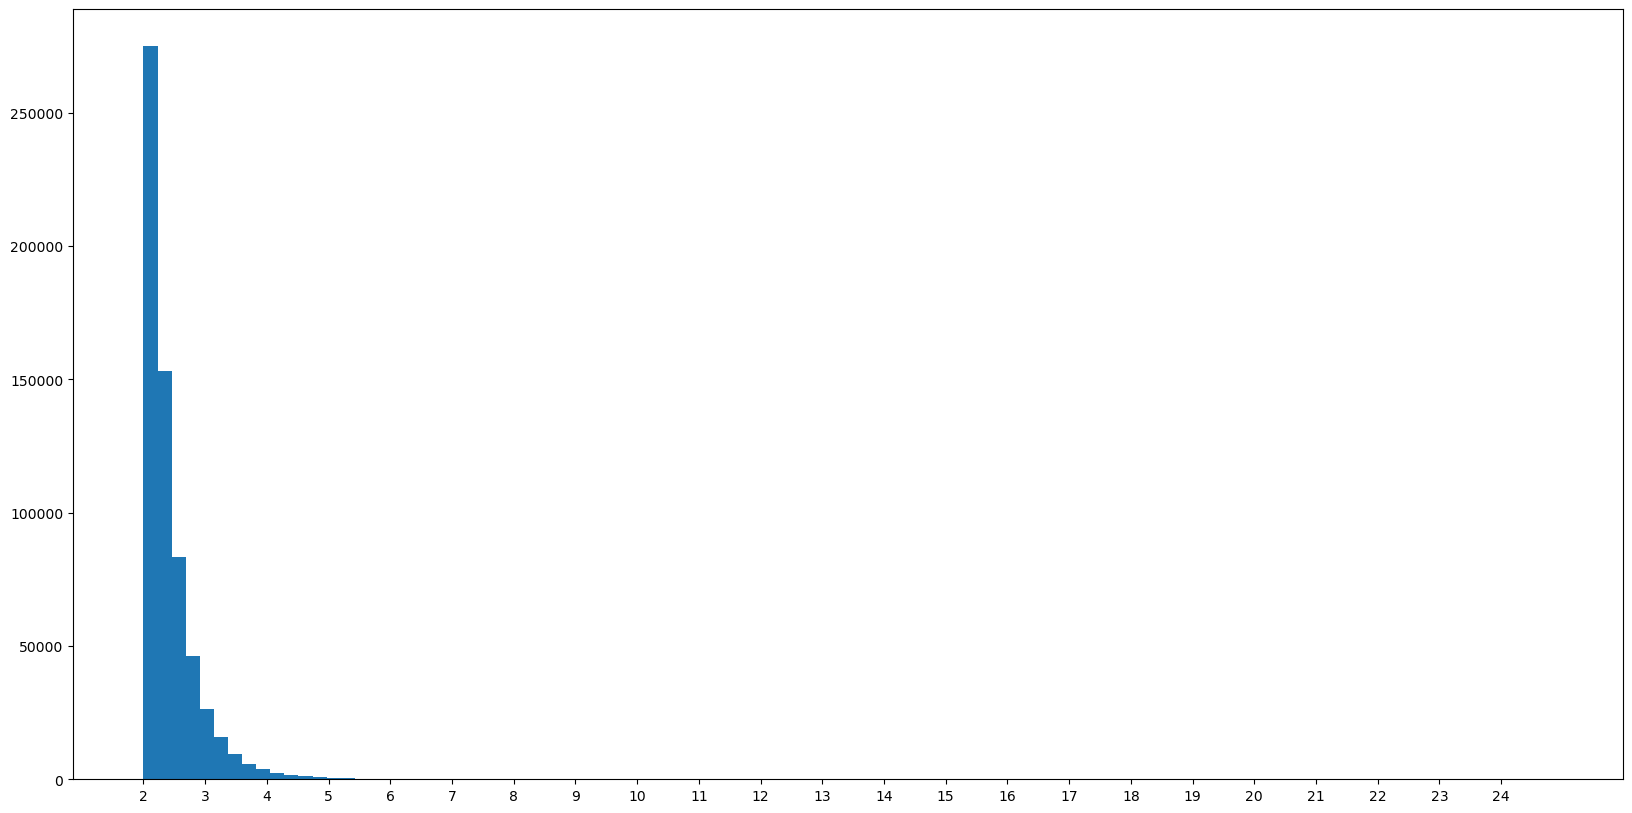

In [20]:
# create histogram with 100 bins and size of plot as wide as screen
plt.figure(figsize=(20, 10))
plt.xticks(np.arange(2, 25, 1))
plt.hist(optical_values_copy, bins=100)

plt.show()

**We decide to cap values above a snow grain diameter of 5mm to 5.**

# Normalization Testing

In [9]:
df = pd.DataFrame(optical_values, columns=["optical_values"])
df

,optical_values
0,0.319352
1,0.453551
2,0.252538
3,0.320762
4,0.207398
...,...
65094977,0.005279
65094978,0.001881
65094979,0.003957
65094980,0.002694


In [25]:
from sklearn.preprocessing import MinMaxScaler
# apply log transformation and save as a new column
df['log_transform'] = np.log(df['optical_values'])

# apply z-score transformation and save as a new column
df['zscore_transform'] = (df['optical_values'] - df['optical_values'].mean()) / df['optical_values'].std()

c:\Users\ninaz\anaconda3\envs\my-env\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
# drop the linear_transform column
df.drop(columns=['linear_transform'], inplace=True)

<AxesSubplot: xlabel='zscore_transform', ylabel='Density'>

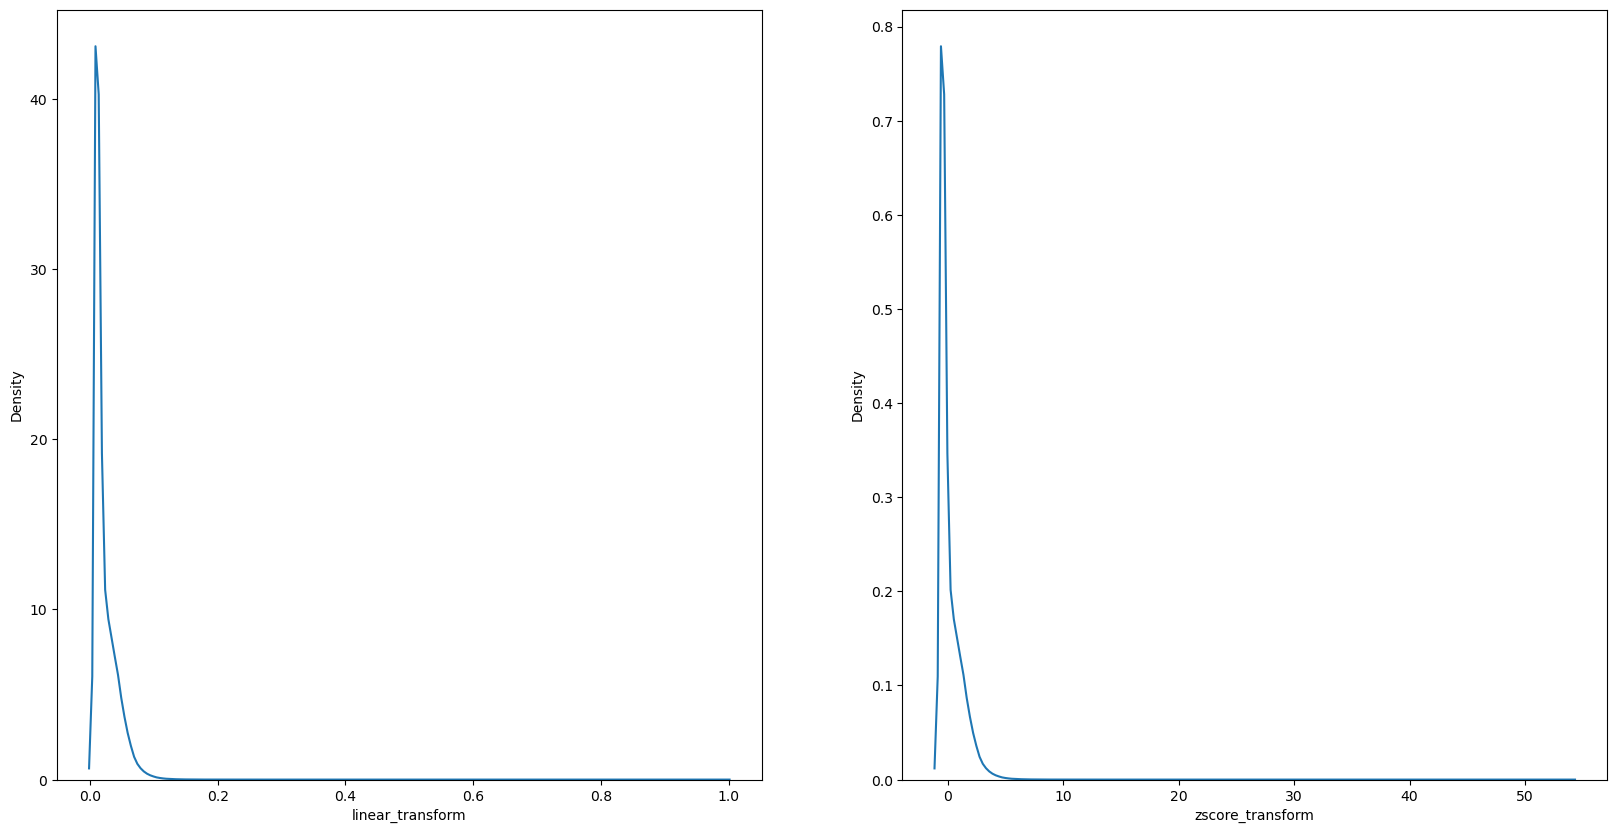

In [20]:
# plot the distribution of the transformed data
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.kdeplot(df['linear_transform'], ax=ax[0])
sns.kdeplot(df['zscore_transform'], ax=ax[1])

MemoryError: Unable to allocate 497. MiB for an array with shape (65094980,) and data type int64

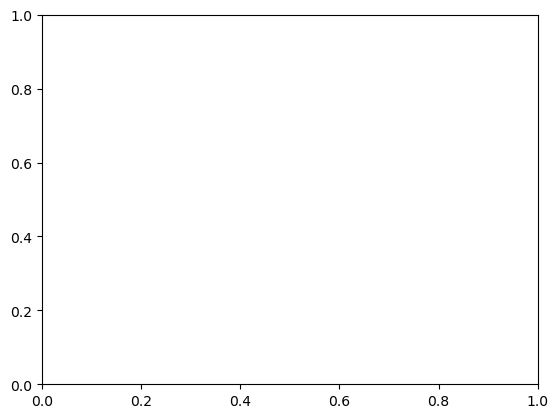

In [30]:
sns.kdeplot(df['log_transform'])

c:\Users\ninaz\anaconda3\envs\my-env\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ninaz\anaconda3\envs\my-env\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ninaz\AppData\Local\Temp\ipykernel_22928\2224122496.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df['log_transform'], ax=ax[0])
c:\Users\ninaz\anaconda3\envs\my-env\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: xlabel='zscore_transform', ylabel='Density'>

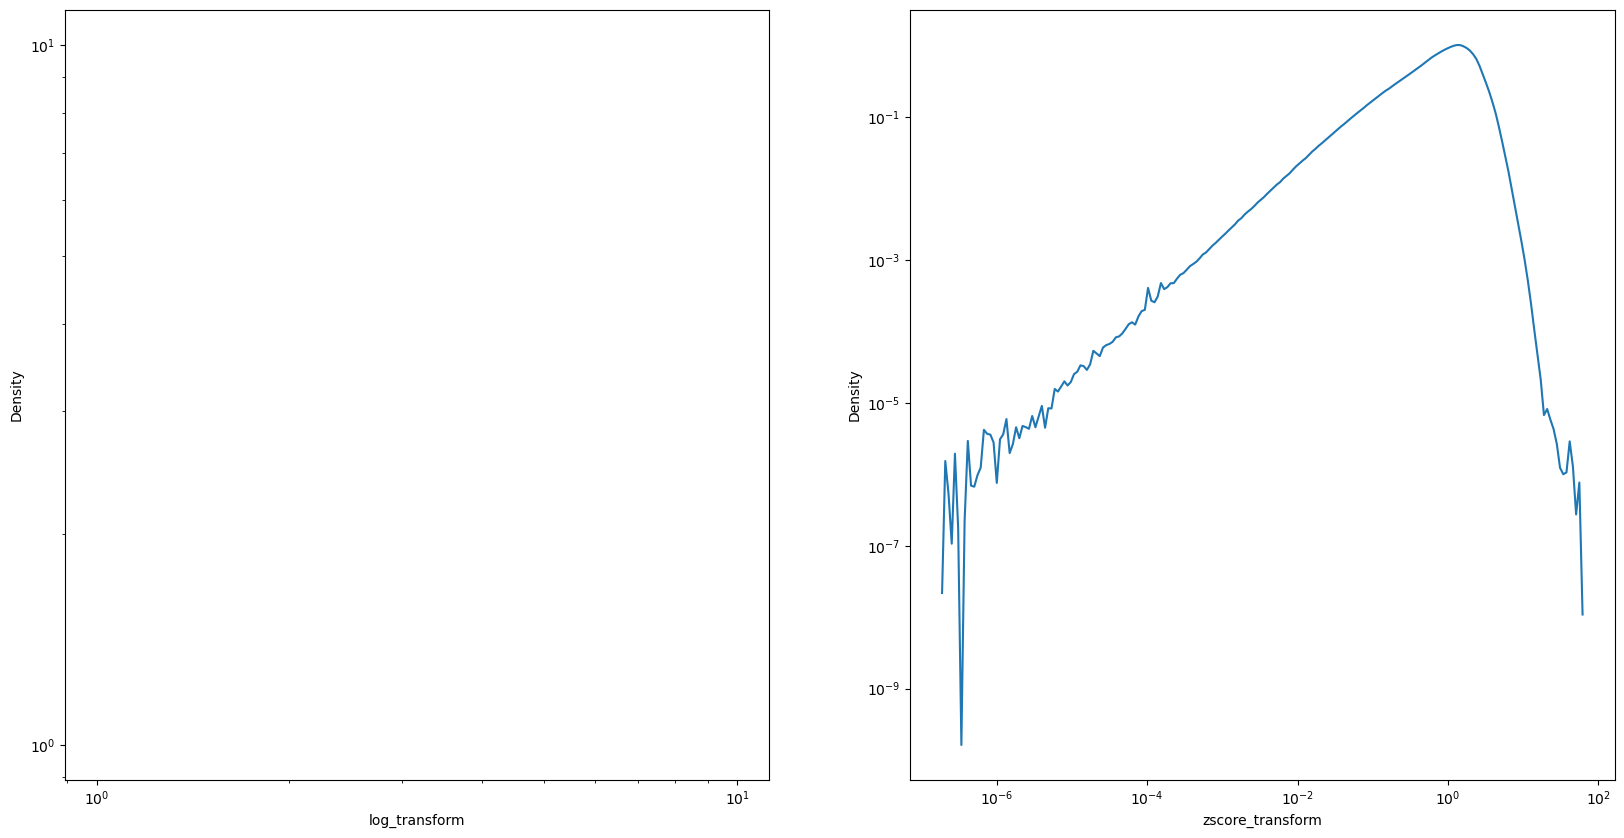

In [28]:
# plot the distribution of the original data and the transformed data as a log-log plot
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
sns.kdeplot(df['log_transform'], ax=ax[0])
sns.kdeplot(df['zscore_transform'], ax=ax[1])